In [1]:
from math import log
def calc_shannon_ent(dataset):
    num_entries= len(dataset) 
    label_counts={}
    for feat_vec in dataset:
        current_label=feat_vec[-1]
        if current_label not in label_counts.keys():
            label_counts[current_label]=0
        label_counts[current_label]+=1
    shannon_ent=0.0
    for key in label_counts:
        prob=float(label_counts[key])/num_entries
        shannon_ent-=prob*log(prob,2)
    return shannon_ent

In [2]:
def create_data_set():
    data_set=[[1,1,'yes'],
             [1,1,'yes'],
             [1,0,'no'],
             [0,1,'no'],
             [0,1,'no']]
    labels=['no surfacing','flippers']
    return data_set,labels

In [3]:
my_dat,labels=create_data_set()

In [4]:
my_dat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
calc_shannon_ent(my_dat)

0.9709505944546686

In [6]:
my_dat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
calc_shannon_ent(my_dat)

0.9709505944546686

In [8]:
def split_data_set(data_set,axis,value):
    ret_data_set =[]
    for feat_vec in data_set:
        if feat_vec[axis]==value:
            reduced_feac_vec=feat_vec[:axis]
            reduced_feac_vec.extend(feat_vec[axis+1:])
            ret_data_set.append(reduced_feac_vec)
    return ret_data_set

In [9]:
split_data_set(my_dat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [10]:
my_dat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [11]:
data_set=my_dat


In [12]:
def choose_best_feature_to_split(data_set):
    num_features= len(data_set[0])-1 #feature的维度，数据是三个，减去一个就是特征数量
    base_entropy = calc_shannon_ent(data_set) #计算数据集的香农熵
    best_info_gain =0.0;bset_feature= -1
    for i in range(num_features):
        feat_list=[example[i] for example in data_set]
        unique_vals =set(feat_list)
        new_entropy = 0.0
        for value in unique_vals:
            sub_data_set= split_data_set(data_set,i,value)
            prob=len(sub_data_set)/float(len(data_set))
            new_entropy+=prob*calc_shannon_ent(sub_data_set)
        info_gain=base_entropy-new_entropy
        if (info_gain>best_info_gain):
            best_info_gain=info_gain
            best_feature=i
    return best_feature

import operator

def majority_cnt(class_list):
    class_count={}
    for vote in class_list:
        if vote not in class_count.keys():class_count[vote]=0
        class_count[vote] +=1
        sorted_class_count=sorted(class_count.iteritems(),
                                  key=operator.itemgetter(1),reverse=True)
    return sorted_class_count[0][0]

def create_tree(data_set,labels):
    class_list=[example[-1]for example in data_set]
    if class_list.count(class_list[0])==len(class_list):
        return class_list[0]
    if len(data_set[0])==1:
        return majority_cnt(class_list)
    best_feat=choose_best_feature_to_split(data_set)
    best_feat_label=labels[best_feat]
    my_tree={best_feat_label:{}}
    del(labels[best_feat])
    feat_values=[example[best_feat]for example in data_set]
    unique_vals=set(feat_values)
    for value in unique_vals:
        sub_labels=labels[:]
        my_tree[best_feat_label][value]=create_tree(split_data_set\
                            (data_set,best_feat,value),sub_labels)
    return my_tree

In [13]:
my_tree=create_tree(my_dat,labels)

In [14]:
my_tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [7]:
import matplotlib.pyplot as plt
decision_node = dict(boxstyle="sawtooth",fc="0.8")
leaf_node = dict (boxstyle="round4",fc="0.8")
arrow_args = dict (arrowstyle="<-")

def plot_node(node_txt,center_pt,parent_pt,node_type):
    create_plot.ax1.annotate(node_txt,xy=parent_pt,xycoords='axes fraction',\
    xytext=center_pt,textcoords='axes fraction',\
    va="center",ha="center",bbox=node_type,arrowprops=arrow_args)
    
def create_plot():
    fig=plt.figure(1,facecolor='white')
    fig.clf
    create_plot.ax1=plt.subplot(111,frameon=False)
    plot_node(U'decision',(0.5,0.1),(0.1,0.5),decision_node)
    plot_node(U'leaf',(0.8,0.1),(0.3,0.8),leaf_node)
    plt.show()

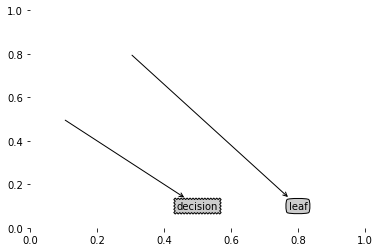

In [8]:
create_plot()

In [9]:
def get_num_leafs(my_tree):
    num_leafs=0
    first_str=my_tree.keys()[0]
    second_dict=my_tree[first_str]
    for key in second_dict.keys():
        if type(second_dict[key]).__name__=='dict':
            num_leafs+=get_num_leafs(second_dict[key])
        else: num_leafs+=1
    return num_leafs

def get_tree_depth(my_tree):
    max_depth=0
    first_dict=my_tree.key()[0]
    second_dict=my_tree[first_str]
    for key in second_dict.keys():
        if type(second_dict[key]).__name__=='dict':
            this_depth=1+get_tree_depth(second_dict[key])
        else: this_depth=1
        if this_depth>max_depth:
            max_depth=this_depth
    return max_depth

In [ ]:
def retrieve_tree(i):
    list_of_trees=[{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                   {''}]